In [1]:
# student_data_cleaning.py

import pandas as pd

# Load dataset
data = pd.read_csv('student-mat.csv', sep=';')

# Create a binary target: pass (1) if final grade G3 >= 10, else fail (0)
data['pass'] = data['G3'] >= 10
data['pass'] = data['pass'].astype(int)

# Drop G3 from features since it's the final grade
features = data.drop(['G3', 'pass'], axis=1)

# Encode categorical variables
features = pd.get_dummies(features, drop_first=True)

# Add target back
features['pass'] = data['pass']

# Save cleaned data
features.to_csv('student_cleaned.csv', index=False)
print("Cleaned data saved as student_cleaned.csv")


Cleaned data saved as student_cleaned.csv


Matplotlib is building the font cache; this may take a moment.


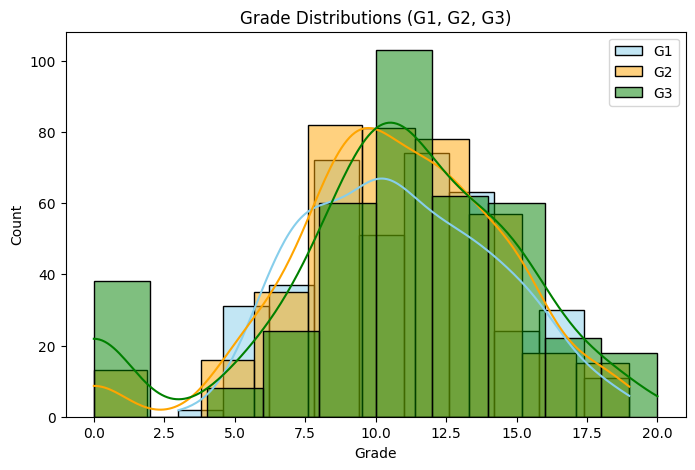

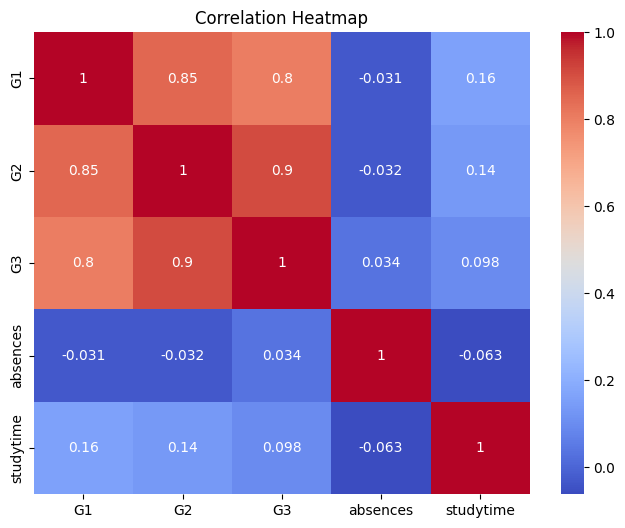

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
data = pd.read_csv('student_cleaned.csv')

# Load original data for grades
original = pd.read_csv('student-mat.csv', sep=';')

# Grade distributions
plt.figure(figsize=(8, 5))
sns.histplot(original['G1'], bins=10, kde=True, color='skyblue', label='G1')
sns.histplot(original['G2'], bins=10, kde=True, color='orange', label='G2')
sns.histplot(original['G3'], bins=10, kde=True, color='green', label='G3')
plt.legend()
plt.title('Grade Distributions (G1, G2, G3)')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.savefig('grade_distributions.png')
plt.show()

# Correlation heatmap
corr = original[['G1', 'G2', 'G3', 'absences', 'studytime']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

Logistic Regression Accuracy: 0.90


/Users/suryagopinath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/suryagopinath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/suryagopinath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/suryagopinath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/suryagopinath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_fea

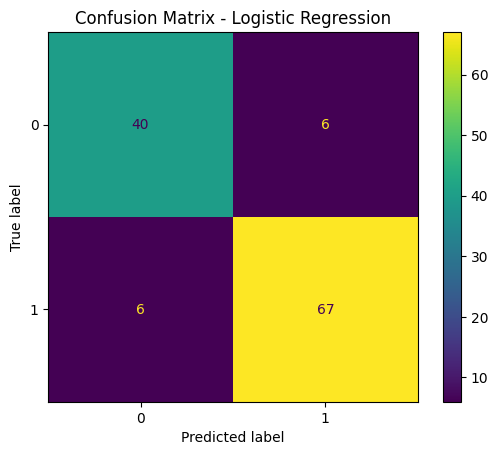

Decision Tree Accuracy: 0.89


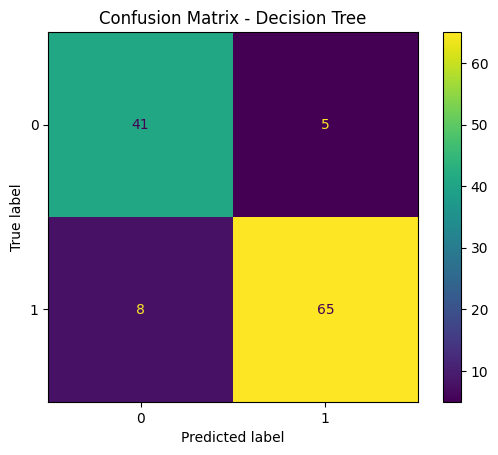

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Load cleaned data
data = pd.read_csv('student_cleaned.csv')

# Separate features and target
X = data.drop('pass', axis=1)
y = data['pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optional: scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.2f}")

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {acc_tree:.2f}")

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()


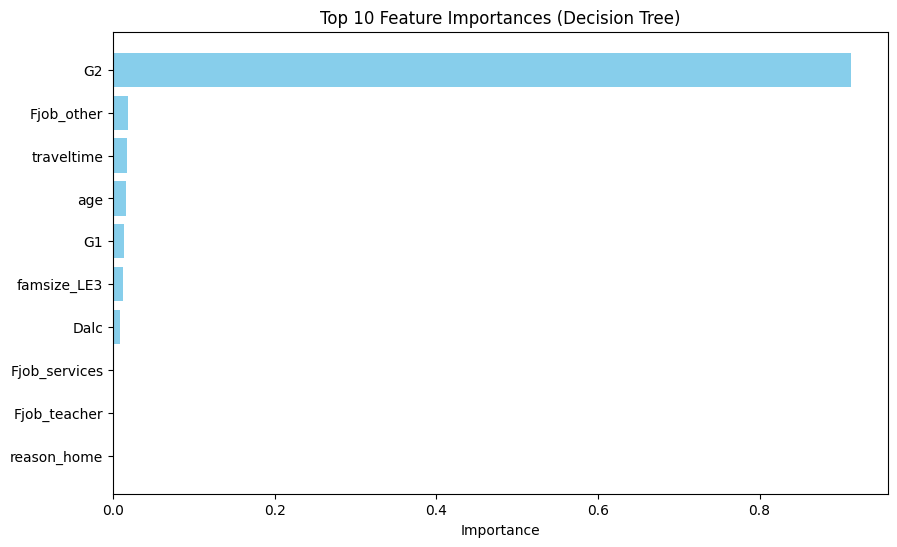

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Load cleaned data
data = pd.read_csv('student_cleaned.csv')

# Separate features and target
X = data.drop('pass', axis=1)
y = data['pass']

# Train Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X, y)

# Get feature importances
importances = tree_model.feature_importances_
feature_names = X.columns

# Create dataframe for plotting
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.show()